In [62]:
# Import 3rd party libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

# Cleaning "Deliv_PLACE.csv"

In Github, this file is zipped due to the large file size. To access the file and run the code, simply download this folder to your local drive and unzip the "Deliv_PLACE.csv.zip" to run.

In [63]:
places_df = pd.read_csv('Deliv_PLACE.csv')

The original file is too large for Github, so we are creating a sample.

In [64]:
# Sample a subset of the dataset
sampled_df = places_df.sample(frac=0.2, random_state=42)  # 20% sample

# Export the sampled dataset to a new CSV file
sampled_df.to_csv('sampled_Deliv_PLACE.csv', index=False)

Let's begin by dropping some columns with high % of missing values.

In [65]:
def drop_high_missing_columns(df, threshold=90):
    """
    Drops columns from the DataFrame that have a percentage of missing values greater than the specified threshold.

    Parameters:
        df (pd.DataFrame): The DataFrame to process.
        threshold (float): The percentage threshold above which columns will be dropped (default: 90).

    Returns:
        pd.DataFrame: The modified DataFrame with high-missing-value columns removed.
        list: A list of columns that were dropped.
    """
    # Calculate the percentage of missing values
    missing_percentage = df.isnull().mean() * 100
    
    # Identify columns exceeding the threshold
    columns_to_drop = missing_percentage[missing_percentage > threshold].index.tolist()
    
    # Drop identified columns
    modified_df = df.drop(columns=columns_to_drop)
    
    # Output details
    print("Columns dropped (more than {}% missing values):".format(threshold))
    print(columns_to_drop)
    print("# of columns dropped: {}".format(len(columns_to_drop)))
    
    return modified_df, columns_to_drop

In [66]:
places_df, dropped_columns = drop_high_missing_columns(places_df)

Columns dropped (more than 90% missing values):
['PER3', 'PER4', 'PER5', 'O_PRKTY', 'PXSTR', 'PRKMIN', 'PAYPK', 'PKAMT', 'PKUNT', 'PRKHW', 'O_PRKHW', 'EMPARK', 'TRANSYS', 'O_TRANSYS', 'ROUTE', 'TripDistanceFlag']
# of columns dropped: 16


In [67]:
places_df.head()

,SAMPN,PERNO,PLANO,TOTTR,HHMEM,PER1,PER2,NONHH,MODE,VEHNO,...,CTFIP,TRACT,PPrimaryCity,PSTFIP,PERWGT,EXPPERWGT,TRIPNO,TCF,TCFPERWGT,EXPTCFPERWGT
0,1031985,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,95.0,252202.0,VALLEJO,6,0.052086,17.647568,NaN,NaN,NaN,NaN
1,1031985,1,2,2.0,0.0,NaN,NaN,1.0,6.0,97.0,...,95.0,960500.0,BENICIA,6,0.052086,17.647568,1.0,0.969789,0.050512,17.114409
2,1031985,1,3,2.0,0.0,NaN,NaN,1.0,6.0,97.0,...,95.0,252202.0,VALLEJO,6,0.052086,17.647568,2.0,1.011905,0.052706,17.857658
3,1031985,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,95.0,252202.0,VALLEJO,6,0.052086,17.647568,NaN,NaN,NaN,NaN
4,1031985,2,2,1.0,0.0,NaN,NaN,0.0,5.0,1.0,...,95.0,950200.0,VALLEJO,6,0.052086,17.647568,1.0,1.119681,0.058320,19.759644


OK, we still have lots of columns left.

In [68]:
columns_list = list(places_df.columns)
print(columns_list)

['SAMPN', 'PERNO', 'PLANO', 'TOTTR', 'HHMEM', 'PER1', 'PER2', 'NONHH', 'MODE', 'VEHNO', 'DYGOV', 'PRKTY', 'ACTCNT', 'ARR_HR', 'ARR_MIN', 'DEP_HR', 'DEP_MIN', 'TRIPDUR', 'ACTDUR', 'PNAME', 'CITY', 'STATE', 'ZIP', 'TripDistance', 'AirTripDistance', 'CTFIP', 'TRACT', 'PPrimaryCity', 'PSTFIP', 'PERWGT', 'EXPPERWGT', 'TRIPNO', 'TCF', 'TCFPERWGT', 'EXPTCFPERWGT']


Now, let's convert the column names into more understandable names from the data dictionary we've created earlier.

In [69]:
def rename_columns_from_file(df, mapping_file, sheet_name="Sheet1", old_col_name="Column Name", new_col_name="Description"):
    """
    Renames the columns of a DataFrame based on a mapping stored in an Excel file.

    Parameters:
        df (pd.DataFrame): The DataFrame whose columns need to be renamed.
        mapping_file (str): Path to the Excel file containing the mapping.
        sheet_name (str): Name of the sheet in the Excel file (default is "Sheet1").
        old_col_name (str): Column in the file with the current column names (default is "Column Name").
        new_col_name (str): Column in the file with the new column names (default is "Description").

    Returns:
        pd.DataFrame: A DataFrame with renamed columns.
    """
    # Load the mapping from the Excel file
    mapping_df = pd.read_excel(mapping_file, sheet_name=sheet_name)
    
    # Create a dictionary for mapping
    column_mapping = mapping_df.set_index(old_col_name)[new_col_name].to_dict()
    
    # Rename the columns in the DataFrame
    df = df.rename(columns=column_mapping)
    return df

In [70]:
mapping_file = "raw_data_dic.xlsx"

places_df = rename_columns_from_file(places_df, mapping_file)

# Check the updated column names
print(places_df.columns)

Index(['Household identifier', 'Person identifier',
       'Place number in the diary', 'Total number of people traveling on trip',
       'Number of household members on trip', 'Person number on trip',
       'Person number on trip',
       'Number of non-household members traveling together',
       'Mode of transport', 'Vehicle identifier', 'Assigned travel day',
       'Parking location type', 'Count of activities on a trip',
       'Hour of arrival', 'Minute of arrival', 'Hour of departure',
       'Minute of departure', 'Duration of trip', 'Duration of activity',
       'Place name', 'City', 'State', 'Zip code', 'Trip distance',
       'Straight-line distance between origin and destination',
       'County FIPS code representing the county associated with the trip or location',
       'Census tract identifier for the trip or location's area',
       'Primary city name associated with the place location',
       'State FIPS code associated with the place', 'Final person weight',
 

Now the names are much easier to understand!

### Rationale for Dropping Specific Columns

We are dropping the following columns to streamline the dataset and align it with our focus on predicting trip mode, purpose, and duration:

1. **Final Person Weight**: This column is used for population scaling, but it is not directly relevant to our predictive modeling focus, which operates at the individual trip level. 
2. **Expanded Final Person Weight**: A scaled version of the `Final Person Weight`. Since we are dropping the latter, this becomes redundant.
3. **Final Trip Weight**: Similar to `Final Person Weight`, this is used for scaling trip data to population levels. It is unnecessary for our scope, which does not involve scaling or weighting.
4. **Expanded Final Trip Weight**: A scaled version of the `Final Trip Weight`. Like the person weights, this is redundant for our purposes.
5. **Unlinked Trip Identifier**: While this helps track individual trip segments, it does not provide actionable information for our models, which do not depend on linked trip data.
6. **Trip Correction Factor**: Adjusts for reporting discrepancies but is not required for our analysis, as the existing weights and raw data provide sufficient reliability.

By removing these columns, we ensure that the dataset focuses on attributes directly contributing to predictive modeling objectives. This reduction minimizes redundancy, simplifies preprocessing, and enhances clarity while retaining the critical data necessary for robust analysis :)

In [71]:
# Updated list of columns to drop
columns_to_drop = [
    'Expanded final person weight', 
    'Unlinked trip identifier', 
    'Trip correction factor', 
    'Expanded final trip weight',
    'Final person weight',  
    'Final trip weight'    
]

# Drop the specified columns from the DataFrame
filtered_df = places_df.drop(columns=columns_to_drop)

To focus on predicting individual trip mode, purpose, and duration, we have removed additional columns that are not directly relevant to these objectives:

1. **Person number on trip**: Enumerates individuals involved in the trip but does not contribute to predicting individual behavior.
2. **Vehicle identifier**: Specific vehicle details are outside the scope of individual travel predictions.
3. **Number of non-household members traveling together**: Does not influence the individual's trip mode, purpose, or duration.
4. **Census tract identifier for the trip or location's area**: Provides geographic details that are unlikely to significantly improve predictions.
5. **State FIPS code associated with the place**: Broad geographic information that does not align with individual-level predictions.
6. **County FIPS code representing the county associated with the trip or location**: Similar to the State FIPS code, this broad geographic identifier adds little value to the prediction of individual trip attributes.
7. **Place number in the diary**: Tracks the sequence of stops but is irrelevant for analyzing individual trip behavior.
8. **Count of activities on a trip**: Does not contribute directly to predicting mode, purpose, or duration and adds unnecessary complexity.

In [72]:
# Updated columns_to_drop list to include only those in the current DataFrame
columns_to_drop = [
    'Vehicle identifier',  
    'Number of non-household members traveling together',  
    'Census tract identifier for the trip or location\'s area',  
    'State FIPS code associated with the place',
    'County FIPS code representing the county associated with the trip or location',
    'Place number in the diary',
    'Person number on trip',  
    'Count of activities on a trip'
]

# Drop the specified columns
filtered_df = filtered_df.drop(columns=columns_to_drop)

# Print the remaining columns to confirm the result
print("Remaining columns in the DataFrame:")
print(filtered_df.columns)

Remaining columns in the DataFrame:
Index(['Household identifier', 'Person identifier',
       'Total number of people traveling on trip',
       'Number of household members on trip', 'Mode of transport',
       'Assigned travel day', 'Parking location type', 'Hour of arrival',
       'Minute of arrival', 'Hour of departure', 'Minute of departure',
       'Duration of trip', 'Duration of activity', 'Place name', 'City',
       'State', 'Zip code', 'Trip distance',
       'Straight-line distance between origin and destination',
       'Primary city name associated with the place location'],
      dtype='object')


### Handling Missing Values in 'Trip distance'

To ensure the quality and consistency of our dataset, we have removed all rows with missing values in the **'Trip distance'** column. This step ensures that only trips with valid distance information are included in the analysis.

In [73]:
# Drop rows where 'Trip distance' is missing
filtered_df = filtered_df.dropna(subset=['Trip distance'])

# Print updated DataFrame shape and columns to confirm
print("Updated DataFrame shape:", filtered_df.shape)
print("Remaining columns after cleaning:")
print(filtered_df.columns)

Updated DataFrame shape: (349385, 20)
Remaining columns after cleaning:
Index(['Household identifier', 'Person identifier',
       'Total number of people traveling on trip',
       'Number of household members on trip', 'Mode of transport',
       'Assigned travel day', 'Parking location type', 'Hour of arrival',
       'Minute of arrival', 'Hour of departure', 'Minute of departure',
       'Duration of trip', 'Duration of activity', 'Place name', 'City',
       'State', 'Zip code', 'Trip distance',
       'Straight-line distance between origin and destination',
       'Primary city name associated with the place location'],
      dtype='object')


We can also merge hour and minute of arrival/departure into time of arrival/departure:

In [74]:
# Convert 'Hour of arrival' and 'Minute of arrival' into a single column 'Time of arrival'
filtered_df['Time of arrival'] = filtered_df['Hour of arrival'].astype(str).str.zfill(2) + ':' + filtered_df['Minute of arrival'].astype(str).str.zfill(2)

# Convert 'Hour of departure' and 'Minute of departure' into a single column 'Time of departure'
filtered_df['Time of departure'] = filtered_df['Hour of departure'].astype(str).str.zfill(2) + ':' + filtered_df['Minute of departure'].astype(str).str.zfill(2)

# Drop the original columns
filtered_df = filtered_df.drop(columns=['Hour of arrival', 'Minute of arrival', 'Hour of departure', 'Minute of departure'])

# Print the first few rows to verify
print(filtered_df[['Time of arrival', 'Time of departure']].head())

  Time of arrival Time of departure
1           09:02             12:53
2           13:13             02:59
4           09:26             10:43
5           10:56             02:59
7           08:35             15:30


## Dealing with City & States Columns

In [75]:
print("Missing values in 'City':", filtered_df['City'].isnull().sum())
print("Missing values in 'State':", filtered_df['State'].isnull().sum())
print("Missing values in 'Zip code':", filtered_df['Zip code'].isnull().sum())

Missing values in 'City': 0
Missing values in 'State': 80
Missing values in 'Zip code': 0


In [76]:
# Transform 'City' column to lowercase and remove spaces
filtered_df['City'] = filtered_df['City'].str.lower().str.replace(' ', '')

# Analyze unique values again after standardization
print("\nUnique values in the standardized 'City' column:")
print(filtered_df['City'].unique())


Unique values in the standardized 'City' column:
['benicia' 'vallejo' 'sandiego' ... 'cascadelocks' 'crescentvalley'
 'meyers']


In [77]:
print(filtered_df['State'].unique())

['CA' 'BC' 'NV' 'BAJA CALIFORNIA' 'OR' 'AZ' 'UT' 'WA' 'MI' 'OH' 'FL' 'CO'
 nan 'TX' 'QC' 'IL' 'JAL' 'MT' 'Mt' 'VA' 'DC' 'IN' 'NY' 'MA' 'AK'
 'STATE OF MEXICO' 'MS' 'GA' 'LA' 'MO' 'HI' 'PA' 'VT' 'NC' 'ID' 'WI' 'NE'
 'WV' 'KY' 'MN' 'Baja California' 'SD' 'MD' 'NH' 'AR' 'DE' 'NJ' 'NM' 'IA'
 'TN' 'NB' 'SC' 'BCS' 'AB' 'CT' 'SUNNYVALE']


In our analysis, the `City` column contained a diverse set of unique values, many of which were inconsistent, ambiguous, or irrelevant to our scope of focusing on major metropolitan areas in California. These included cities with variations in capitalization, spaces, or alternative spellings, making direct analysis challenging. Additionally, the `State` column included entries for regions outside California, further complicating the filtering process. Therefore, let's use ZIP codes.

#### Why ZIP Codes?
We decided to use ZIP codes as a reliable and standardized geographic indicator. ZIP codes are directly tied to specific regions and offer the following advantages:
1. **Consistency**: Unlike the `City` column, ZIP codes are structured and free from formatting inconsistencies.
2. **Granularity**: ZIP codes allow us to group trips into major metropolitan regions without the ambiguity present in city names.
3. **Alignment with Major Regions**: By leveraging the first three digits of ZIP codes, we accurately captured trips within major California regions (e.g., Greater Los Angeles, San Francisco Bay Area, San Diego). This grouping ensures relevance and focus on areas of interest. This will also help us for the weather API integration.

#### Our Approach
1. **Mapping ZIP Code Prefixes**: We created a dictionary mapping the first three digits of ZIP codes to major California metropolitan regions.
2. **Creating `city_from_zip`**: A new column, `city_from_zip`, was generated to assign each ZIP code to its corresponding region based on this mapping.
3. **Handling Missing `city_from_zip` Values**:
   - For rows with missing `city_from_zip`, we explored the `City` column to identify potential values that could fill these gaps.
   - Missing rows were cross-checked with the `City` column to track cities that could not be assigned to regions based on their ZIP codes.

In [78]:
# Define a dictionary of metropolitan areas and their corresponding ZIP code prefixes
metro_areas = {
    'Greater Los Angeles Area': ['900', '901', '902', '903', '904', '905', '906', '907', '908',
                                 '910', '911', '912', '913', '914', '915', '916', '917', '918',
                                 '920', '921', '923', '924', '925', '926', '927', '928'],
    'San Francisco Bay Area': ['940', '941', '942', '943', '944', '945', '946', '947', '948',
                                '950', '951', '954'],
    'San Diego County': ['919', '920', '921'],
    'Sacramento Area': ['942', '943', '956', '957', '958'],
    'Fresno Area': ['936', '937'],
    'Stockton Area': ['952', '953'],
    'Bakersfield Area': ['932', '933'],
    'Riverside-San Bernardino': ['922', '923', '924', '925']
}

# Create a new column 'city_from_zip' with default value as empty
filtered_df['city_from_zip'] = np.nan

In [79]:
# Function to assign a metropolitan area based on the ZIP code prefix
def assign_city_from_zip(zip_code):
    zip_code_str = str(zip_code)[:3]  # Extract the first three digits
    for city, prefixes in metro_areas.items():
        if zip_code_str in prefixes:
            return city
    return np.nan  # If no match is found

In [80]:
filtered_df['city_from_zip'] = filtered_df['Zip code'].apply(assign_city_from_zip)

In [81]:
# Create a set to store unique cities corresponding to missing 'city_from_zip'
missing_city_values_set = set()

# Function to track cities for rows where 'city_from_zip' is missing
def track_missing_city(row):
    if pd.isnull(row['city_from_zip']) and not pd.isnull(row['City']):
        missing_city_values_set.add(row['City'])  # Add the city to the set
    return row['city_from_zip']  # Do not modify the column

# Apply the function row-wise to track missing 'city_from_zip' values
filtered_df.apply(track_missing_city, axis=1)

# Display the percentage of remaining missing values
remaining_missing_percentage = filtered_df['city_from_zip'].isnull().mean() * 100
print(f"Percentage of missing values in 'city_from_zip': {remaining_missing_percentage:.2f}%")

# Display the unique cities corresponding to missing 'city_from_zip'
print("Unique cities corresponding to missing 'city_from_zip':")
print(sorted(missing_city_values_set))  # Sorted for better readability

Percentage of missing values in 'city_from_zip': 16.98%
Unique cities corresponding to missing 'city_from_zip':
['acton', 'adelanto', 'adin', 'albuquerque', 'aldermaston', 'alexandria', 'alisal', 'alleghany', 'alpinemeadows', 'alpinevillage', 'alturas', 'amarillo', 'anaheim', 'anchorage', 'anderson', 'antelope', 'antioch', 'aptos', 'arbuckle', 'arcata', 'arcola', 'arlington', 'arrowheadentertainmentdistrict', 'arroyogrande', 'ashland', 'atascadero', 'atlanta', 'auburn', 'austin', 'avilabeach', 'bainbridgeisland', 'bakersfield', 'baldwinpark', 'ballard', 'baltimore', 'bangor', 'bayside', 'baywood-lososos', 'bealeafb', 'bearvalleysprings', 'beaver', 'beckwourth', 'belden', 'bellavista', 'beltiburon', 'belvedere', 'belvederetiburon', 'bend', 'bennington', 'bensenville', 'benton', 'bentonharbor', 'bentonville', 'berkeley', 'berrycreek', 'bertsch-oceanview', 'bethesda', 'bieber', 'bigbar', 'bigbend', 'biggs', 'bigpine', 'bigsur', 'bijou', 'billerica', 'billings', 'bishop', 'blackpoint-green

### Handling Missing `city_from_zip` Values

Upon reviewing the rows with missing `city_from_zip` values, we observed a significant number of unique cities that do not align with our project scope of focusing on major metropolitan areas in California. Many of these entries correspond to cities outside California, such as `albuquerque`, `atlanta`, and `boston`, or represent minor or ambiguous locations within the state that are unlikely to contribute meaningfully to our analysis. Additionally, these rows lack sufficient geographic context for proper classification into our targeted regions.

Given our objective to analyze travel patterns within California’s major regions (e.g., Greater Los Angeles, San Francisco Bay Area, San Diego, Sacramento), retaining these rows introduces noise and reduces the clarity and focus of our analysis. To streamline the dataset and ensure alignment with our goals, we decided to drop rows where `city_from_zip` remains missing (`NaN`) after attempting to infer values from the `City` column.

In [82]:
# Drop rows where 'city_from_zip' is NaN
filtered_df = filtered_df.dropna(subset=['city_from_zip'])

# Display the shape of the updated DataFrame
print("Updated DataFrame shape after dropping rows with missing 'city_from_zip':", filtered_df.shape)

Updated DataFrame shape after dropping rows with missing 'city_from_zip': (290067, 19)


After creating the `city_from_zip` column, which provides a standardized and consistent representation of metropolitan areas, the `City` and `State` columns are no longer necessary. The `city_from_zip` column consolidates geographic information into a single feature, aligning with our focus on major regions in California. Retaining the `City` and `State` columns would introduce redundancy and add no additional value to our analysis. We will also drop `Place name` since it has been redacted in the raw dataset.

In [83]:
# Drop the 'City' and 'State' columns
filtered_df = filtered_df.drop(columns=['City', 'State', 'Place name'])

# Display the remaining columns
print("Updated columns in the DataFrame:")
print(filtered_df.columns)

Updated columns in the DataFrame:
Index(['Household identifier', 'Person identifier',
       'Total number of people traveling on trip',
       'Number of household members on trip', 'Mode of transport',
       'Assigned travel day', 'Parking location type', 'Duration of trip',
       'Duration of activity', 'Zip code', 'Trip distance',
       'Straight-line distance between origin and destination',
       'Primary city name associated with the place location',
       'Time of arrival', 'Time of departure', 'city_from_zip'],
      dtype='object')


<Axes: >

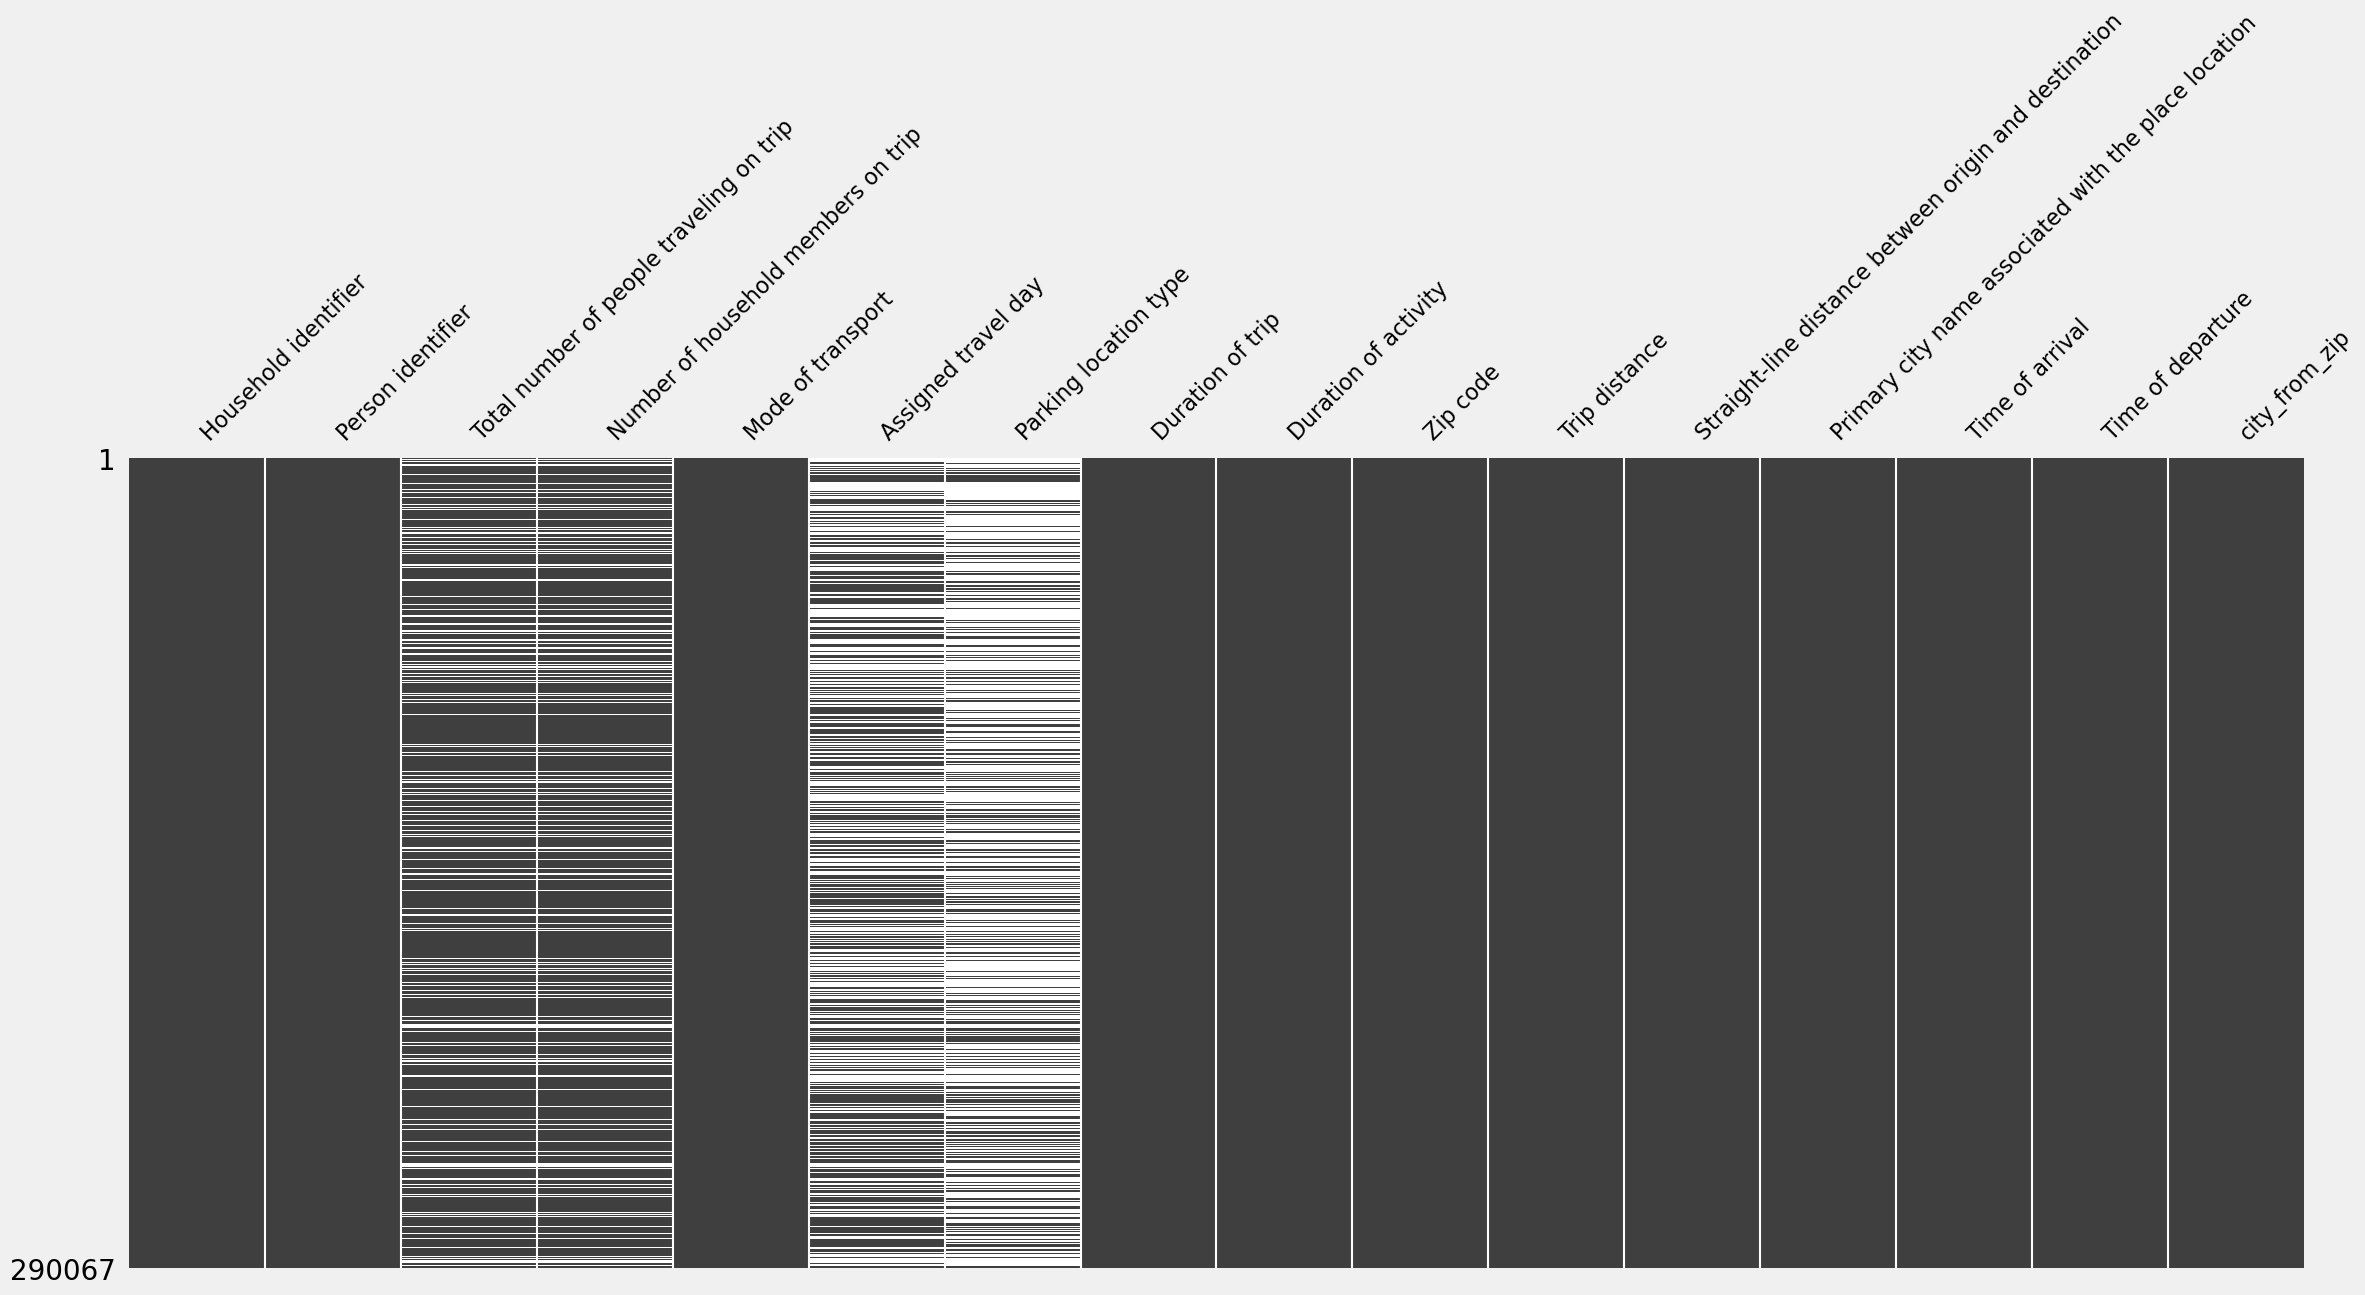

In [84]:
import missingno as msno
msno.matrix(filtered_df, sparkline=False)

Finally, we removed the following columns due to their limitations:

1. **Primary city name associated with the place location**:  
 We opted to rely on the `city_from_zip` column, which provides a more consistent and standardized representation of metropolitan areas based on ZIP codes.

2. **Parking location type**:  
   Although parking details might offer insights into trip characteristics, the high proportion of missing values renders this column unreliable for predictive modeling. Additionally, parking information is less critical for our primary objectives.

---

### Retaining Other Columns (although with some missing values for now)

1. **Assigned travel day**:  
   Despite some missing data, this column will not be dropped as we have a date column in another dataset that can complement and enhance its information, ensuring minimal loss in data utility.

2. **Total number of people traveling on trip** and **Number of household members on trip**:  
   These columns don't have that many missing values and provide valuable contextual information about trip dynamics. Thus, they are retained for potential use in predictive modeling. The missing values maybe can be dealt in the future with some EDA.

In [85]:
columns_to_drop = [
    'Primary city name associated with the place location', 
    'Parking location type'
]

filtered_df = filtered_df.drop(columns=columns_to_drop)

## Export

In [86]:
# Create a new column 'hh_person_id' by merging 'Household identifier' and 'Person identifier'
filtered_df['hh_person_id'] = filtered_df['Household identifier'].astype(str) + '_' + filtered_df['Person identifier'].astype(str)

# Drop the original 'Household identifier' and 'Person identifier' columns
filtered_df = filtered_df.drop(columns=['Household identifier', 'Person identifier'])

# Set 'hh_person_id' as the index
filtered_df = filtered_df.set_index('hh_person_id')


In [87]:
filtered_df.head()

,Total number of people traveling on trip,Number of household members on trip,Mode of transport,Assigned travel day,Duration of trip,Duration of activity,Zip code,Trip distance,Straight-line distance between origin and destination,Time of arrival,Time of departure,city_from_zip
hh_person_id,,,,,,,,,,,,
1031985_1,2.0,0.0,6.0,1.0,22.0,231,94510,13.428271,7.647539,09:02,12:53,San Francisco Bay Area
1031985_1,2.0,0.0,6.0,NaN,20.0,826,94591,12.975526,7.647539,13:13,02:59,San Francisco Bay Area
1031985_2,1.0,0.0,5.0,1.0,10.0,77,94589,5.125961,3.411647,09:26,10:43,San Francisco Bay Area
1031985_2,1.0,0.0,5.0,NaN,13.0,963,94591,5.126981,3.411647,10:56,02:59,San Francisco Bay Area
1032036_1,3.0,2.0,5.0,1.0,20.0,415,92128,3.619057,2.740749,08:35,15:30,Greater Los Angeles Area


In [88]:
filtered_df.to_csv('cleaned_places_df.csv')